# Notebook 01 — Generating and Exploring S_n

This notebook verifies **Claim 1**: the unrestricted scheduling space for `n` processes is the symmetric group `S_n` with `n!` elements.

We generate `S_n` from scratch, inspect its elements, verify its size, and visualize how `|S_n|` grows with `n`.

---

**Claim 1 (formal):**  
Let `P = {1, ..., n}` be a set of processes. The set of all bijections `σ: P → P` forms a group `(S_n, ∘)` of order `n!`.

## Setup

Make sure you run this notebook from the `notebooks/` directory, with `src/` on the path.

In [2]:
import sys
import os
sys.path.insert(0, os.path.join(os.path.dirname('__file__'), '..', 'src'))

import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from permutations import (
    generate_Sn,
    identity,
    compose,
    inverse,
    power,
    order,
    to_cycles,
    cycle_notation_str,
    is_subgroup,
    print_group,
)

---
## 1. Generating S_n

We generate all `n!` permutations of `{1, ..., n}`. Each permutation is a Python dict `{i: σ(i)}`.

In [3]:
# Generate S_3 and display all elements
S3 = generate_Sn(3)

print(f"|S_3| = {len(S3)}  (expected 3! = {math.factorial(3)})\n")
print_group(S3, label="S_3")

|S_3| = 6  (expected 3! = 6)

S_3  (order 6):
  e  →  [1, 2, 3]
  (2 3)  →  [1, 3, 2]
  (1 2)  →  [2, 1, 3]
  (1 2 3)  →  [2, 3, 1]
  (1 3 2)  →  [3, 1, 2]
  (1 3)  →  [3, 2, 1]


In [4]:
# Verify |S_n| = n! for n = 2 to 7
print(f"{'n':<6} {'|S_n|':<12} {'n!':<12} {'Match'}")
print("-" * 38)

for n in range(2, 8):
    Sn      = generate_Sn(n)
    nfact   = math.factorial(n)
    match   = "✓" if len(Sn) == nfact else "✗"
    print(f"{n:<6} {len(Sn):<12} {nfact:<12} {match}")

n      |S_n|        n!           Match
--------------------------------------
2      2            2            ✓
3      6            6            ✓
4      24           24           ✓
5      120          120          ✓
6      720          720          ✓
7      5040         5040         ✓


---
## 2. Group Operations

Verify that `S_n` is closed under composition and inverses.

In [5]:
# Composition example in S_3
s1 = {1: 2, 2: 1, 3: 3}   # (1 2)
s2 = {1: 1, 2: 3, 3: 2}   # (2 3)

result = compose(s1, s2)

print(f"(1 2) ∘ (2 3) = {cycle_notation_str(result)}")
print(f"Expected: (1 2 3)")

(1 2) ∘ (2 3) = (1 2 3)
Expected: (1 2 3)


In [6]:
# Inverse example
sigma     = {1: 2, 2: 3, 3: 1}   # (1 2 3)
sigma_inv = inverse(sigma)

print(f"σ       = {cycle_notation_str(sigma)}")
print(f"σ⁻¹     = {cycle_notation_str(sigma_inv)}")
print(f"σ ∘ σ⁻¹ = {cycle_notation_str(compose(sigma, sigma_inv))}  (should be e)")

σ       = (1 2 3)
σ⁻¹     = (1 3 2)
σ ∘ σ⁻¹ = e  (should be e)


In [7]:
# Order of elements in S_4
S4 = generate_Sn(4)

print("Orders of elements in S_4:\n")
print(f"  {'Permutation':<20} {'Order'}")
print("  " + "-"*28)

for sigma in S4:
    print(f"  {cycle_notation_str(sigma):<20} {order(sigma)}")

Orders of elements in S_4:

  Permutation          Order
  ----------------------------
  e                    1
  (3 4)                2
  (2 3)                2
  (2 3 4)              3
  (2 4 3)              3
  (2 4)                2
  (1 2)                2
  (1 2)(3 4)           2
  (1 2 3)              3
  (1 2 3 4)            4
  (1 2 4 3)            4
  (1 2 4)              3
  (1 3 2)              3
  (1 3 4 2)            4
  (1 3)                2
  (1 3 4)              3
  (1 3)(2 4)           2
  (1 3 2 4)            4
  (1 4 3 2)            4
  (1 4 2)              3
  (1 4 3)              3
  (1 4)                2
  (1 4 2 3)            4
  (1 4)(2 3)           2


---
## 3. Verifying the Subgroup Axioms

`S_n` is a subgroup of itself. We verify all three axioms explicitly.

In [8]:
for n in range(2, 6):
    Sn     = generate_Sn(n)
    result = is_subgroup(Sn, n)
    print(f"S_{n} satisfies subgroup axioms: {'✓' if result else '✗'}")

S_2 satisfies subgroup axioms: ✓
S_3 satisfies subgroup axioms: ✓
S_4 satisfies subgroup axioms: ✓
S_5 satisfies subgroup axioms: ✓


---
## 4. Visualizing |S_n| = n!

The scheduling space grows factorially. This plot shows how fast `|S_n|` grows — and why we only verify computationally up to `n = 6` or `7`.

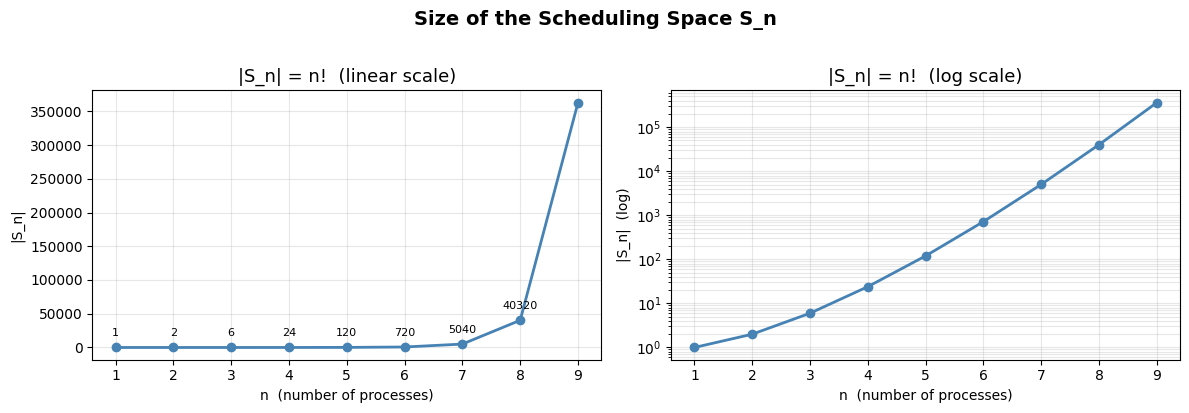


Computational feasibility:
  n=6 :      720 schedules  ← verified
  n=7 :     5040 schedules  ← slow but feasible
  n=8 :    40320 schedules  ← expensive
  n=10:  3628800 schedules  ← impractical by enumeration


In [9]:
ns      = list(range(1, 10))
sizes   = [math.factorial(n) for n in ns]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Linear scale
axes[0].plot(ns, sizes, marker='o', color='steelblue', linewidth=2, markersize=6)
axes[0].set_title('|S_n| = n!  (linear scale)', fontsize=13)
axes[0].set_xlabel('n  (number of processes)')
axes[0].set_ylabel('|S_n|')
axes[0].set_xticks(ns)
axes[0].grid(True, alpha=0.3)

for x, y in zip(ns, sizes):
    if y < 50000:
        axes[0].annotate(str(y), (x, y), textcoords='offset points',
                         xytext=(0, 8), ha='center', fontsize=8)

# Log scale
axes[1].plot(ns, sizes, marker='o', color='steelblue', linewidth=2, markersize=6)
axes[1].set_yscale('log')
axes[1].set_title('|S_n| = n!  (log scale)', fontsize=13)
axes[1].set_xlabel('n  (number of processes)')
axes[1].set_ylabel('|S_n|  (log)')
axes[1].set_xticks(ns)
axes[1].grid(True, alpha=0.3, which='both')

plt.suptitle('Size of the Scheduling Space S_n', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../notebooks/sn_growth.png', dpi=120, bbox_inches='tight')
plt.show()

print("\nComputational feasibility:")
print(f"  n=6 : {math.factorial(6):>8} schedules  ← verified")
print(f"  n=7 : {math.factorial(7):>8} schedules  ← slow but feasible")
print(f"  n=8 : {math.factorial(8):>8} schedules  ← expensive")
print(f"  n=10: {math.factorial(10):>8} schedules  ← impractical by enumeration")

---
## 5. Scheduling Interpretation

Each element of `S_n` is a valid process schedule. Here we display every element of `S_4` as an explicit execution queue.

In [10]:
S4 = generate_Sn(4)

print("All 24 schedules in S_4 (each row = one valid process ordering):\n")
print(f"  {'#':<5} {'Permutation':<20} {'Execution Queue'}")
print("  " + "-"*45)

for i, sigma in enumerate(S4, 1):
    queue = list(sigma.values())
    print(f"  {i:<5} {cycle_notation_str(sigma):<20} {queue}")

All 24 schedules in S_4 (each row = one valid process ordering):

  #     Permutation          Execution Queue
  ---------------------------------------------
  1     e                    [1, 2, 3, 4]
  2     (3 4)                [1, 2, 4, 3]
  3     (2 3)                [1, 3, 2, 4]
  4     (2 3 4)              [1, 3, 4, 2]
  5     (2 4 3)              [1, 4, 2, 3]
  6     (2 4)                [1, 4, 3, 2]
  7     (1 2)                [2, 1, 3, 4]
  8     (1 2)(3 4)           [2, 1, 4, 3]
  9     (1 2 3)              [2, 3, 1, 4]
  10    (1 2 3 4)            [2, 3, 4, 1]
  11    (1 2 4 3)            [2, 4, 1, 3]
  12    (1 2 4)              [2, 4, 3, 1]
  13    (1 3 2)              [3, 1, 2, 4]
  14    (1 3 4 2)            [3, 1, 4, 2]
  15    (1 3)                [3, 2, 1, 4]
  16    (1 3 4)              [3, 2, 4, 1]
  17    (1 3)(2 4)           [3, 4, 1, 2]
  18    (1 3 2 4)            [3, 4, 2, 1]
  19    (1 4 3 2)            [4, 1, 2, 3]
  20    (1 4 2)              [4, 1, 3, 2]
 

---
## 6. Summary

**Claim 1 verified.**

| n | `|S_n|` | `n!` | Match |
|---|---------|------|-------|
| 2 | 2       | 2    | ✓     |
| 3 | 6       | 6    | ✓     |
| 4 | 24      | 24   | ✓     |
| 5 | 120     | 120  | ✓     |
| 6 | 720     | 720  | ✓     |

The unrestricted scheduling space for `n` processes is exactly `S_n` with `n!` elements. Each element is a bijection representing one valid total ordering of the processes.

**Next:** [02 — Computing the Stabilizer Subgroup](02_compute_stabilizer.ipynb)